## LIMIT OF DIVERSIFICATION

In [1]:
# used during development to releoad modules every time there is a change
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from risk_kit import Metrics, pre_processing_ind, get_ind30_nfirms, get_ind30_size, plot_ef2
pd.options.display.float_format = '{:.6f}'.format

In [2]:
metrics= Metrics()
ind_returns = pre_processing_ind()
ind_nfirms = get_ind30_nfirms()
ind_size = get_ind30_size()
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [3]:
print(ind_returns.shape)
print(ind_nfirms.shape)
print(ind_returns.shape)

(1110, 30)
(1110, 30)
(1110, 30)


In [4]:
# Total Market Cap: nr. of shares outstanding * price per share (not considering the floating adjustment)
ind_mkt_cap = ind_nfirms * ind_size
ind_mkt_cap.shape

(1110, 30)

In [5]:
tot_mktcap = ind_mkt_cap.sum(axis=1)

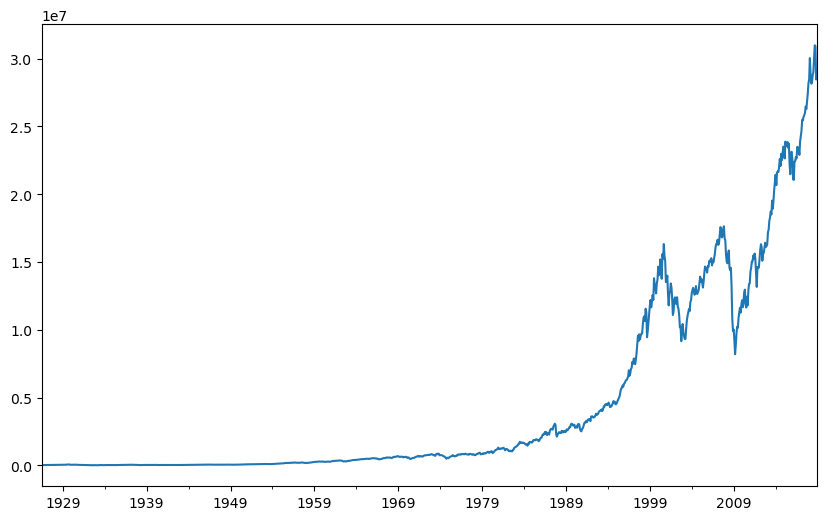

In [6]:
tot_mktcap.plot();

In [7]:
tot_mktcap.head()

1926-07   26657.940000
1926-08   27436.340000
1926-09   28060.410000
1926-10   28057.230000
1926-11   27198.400000
Freq: M, dtype: float64

In [8]:
# weights of the industries over time
ind_capweight = ind_mkt_cap.div(tot_mktcap, axis=0) # division by rows

In [9]:
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [10]:
ind_capweight.loc["1926"].sum(axis=1)

1926-07   1.000000
1926-08   1.000000
1926-09   1.000000
1926-10   1.000000
1926-11   1.000000
1926-12   1.000000
Freq: M, dtype: float64

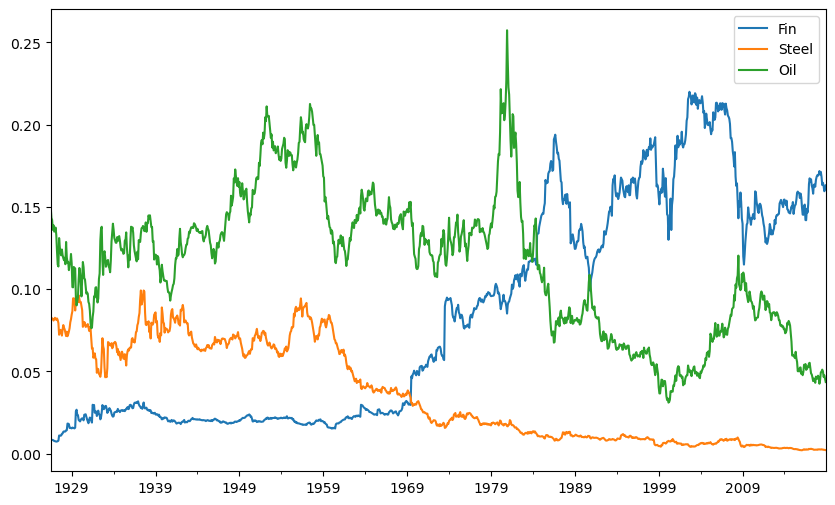

In [11]:
ind_capweight[["Fin", "Steel", "Oil"]].plot();

In [12]:
# cap-weighted market index
total_market_return = (ind_capweight * ind_returns).sum(axis=1)
total_market_return

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

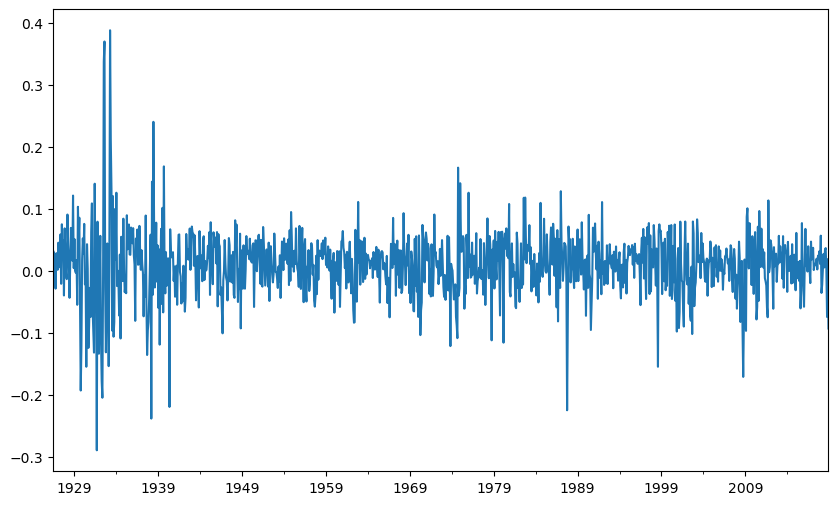

In [13]:
total_market_return.plot();

In [14]:
total_market_return

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

In [15]:
total_market_index = 1000*(1 + total_market_return).cumprod()

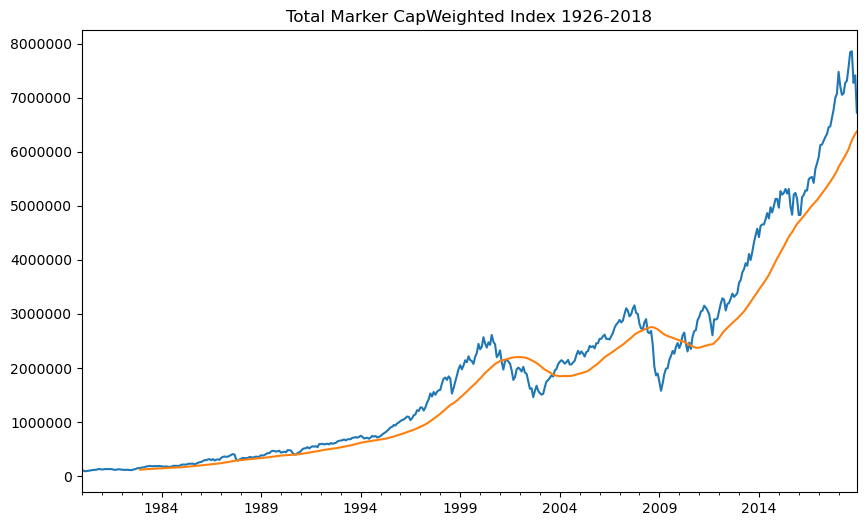

In [16]:
plt.ticklabel_format(style='plain') # do not use scientific notation on axix
total_market_index["1980":].plot(title = "Total Marker CapWeighted Index 1926-2018");
# trailing 36-month returns
total_market_index["1980":].rolling(window=36).mean().plot();

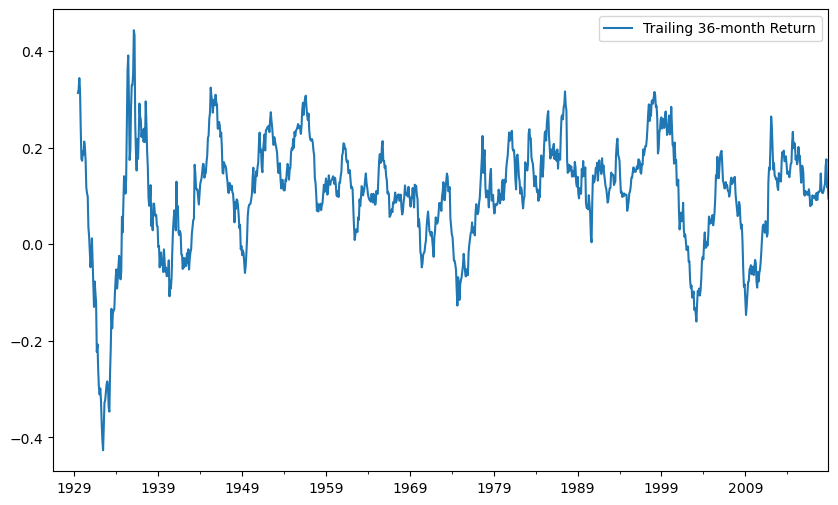

In [26]:
# trailing 36-month compounded returns for the total market index
tmi_tr36rets = total_market_return.rolling(window=36).agg(metrics.annualized_rets, periods_per_year = 12)
tmi_tr36rets.plot(label= "Trailing 36-month Return", legend=True);
#total_market_return.plot(label= "Monthly Return", legend=True);

### Rolling Correlation - along with MultiIndexes and groupby
relationship between Annualized Return and Correlation (average correlation of across these industries)

In [ ]:
ts_corr = ind_returns.rolling(window=36).corr()
ts_corr.index.names = ["date", "industry"]
ts_corr.tail()

In [43]:
ind_tr36corr = ts_corr.groupby(level="date").apply(lambda cormat: cormat.values.mean())

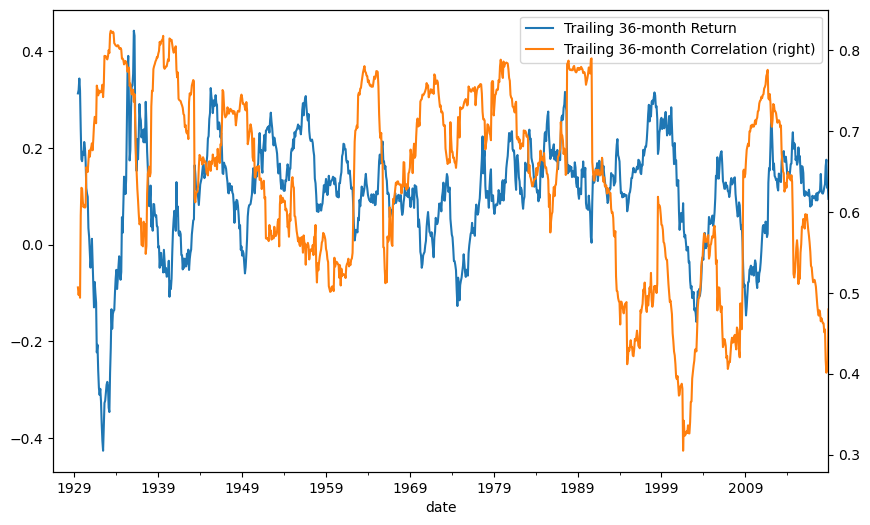

In [44]:
tmi_tr36rets.plot(label= "Trailing 36-month Return", legend=True);
ind_tr36corr.plot(label= "Trailing 36-month Correlation", legend=True, secondary_y = True);

### COMMENTS:
When market is plunging correlation is rising and viceversa.
Diversification fails when you need it most !!! (This happens in most cases)

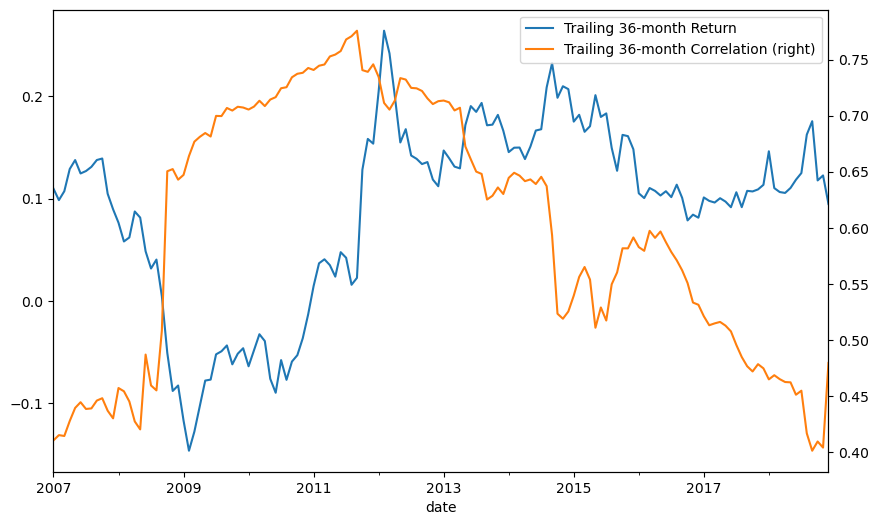

In [49]:
# during the 2008 financial market crash
tmi_tr36rets["2007":].plot(label= "Trailing 36-month Return", legend=True);
ind_tr36corr["2007":].plot(label= "Trailing 36-month Correlation", legend=True, secondary_y = True);
plt.savefig("2008_market_crash.jpg") # save as png

In [46]:
# correlation between the trailing returns and the trailing average correlation:
# THAT IS THE PROBLEM!
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884026